<a href="https://colab.research.google.com/github/AtefehT1403/practice/blob/main/simplepespetronIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

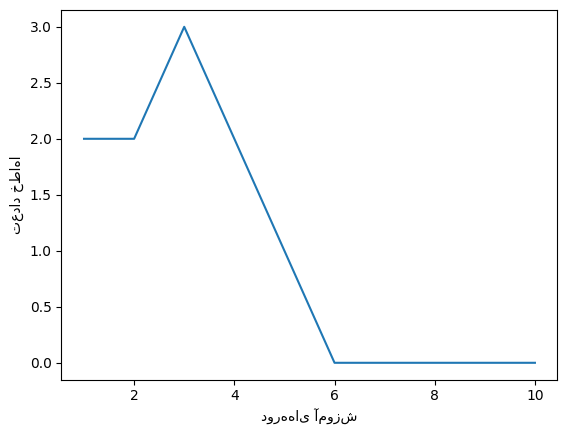

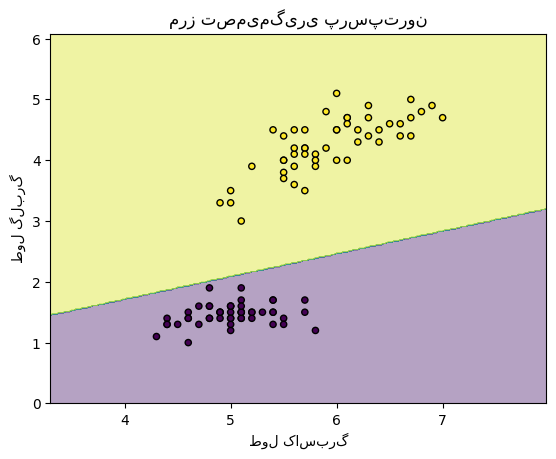

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# بارگذاری دیتاست
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

# انتخاب دو کلاس اول (ستوسا و ورسیکالر) و دو ویژگی (طول گلبرگ و طول کاسبرگ)
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)  # برچسبگذاری مجدد
class Perceptron:
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.errors = []

    def fit(self, X, y):
        # مقداردهی اولیه وزنها (شامل بایاس)
        self.weights = np.zeros(1 + X.shape[1])

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update  # بهروزرسانی بایاس
                errors += int(update != 0.0)
            self.errors.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
# ایجاد نمونه مدل و آموزش
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.fit(X, y)

# نمایش خطا در هر دوره
plt.plot(range(1, len(perceptron.errors) + 1), perceptron.errors)
plt.xlabel('دورههای آموزش')
plt.ylabel('تعداد خطاها')
plt.show()
# تابع برای رسم مرز تصمیم
def plot_decision_regions(X, y, classifier):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, s=20, edgecolor='k')
    plt.xlabel('طول کاسبرگ')
    plt.ylabel('طول گلبرگ')

# رسم نتایج
plot_decision_regions(X, y, perceptron)
plt.title('مرز تصمیمگیری پرسپترون')
plt.show()
